In [1]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
#data=pd.read_fwf('page-blocks.txt',header=None)
data = pd.read_csv("dia.csv", sep=",", header=None, index_col=False)
#data.describe(include='all')

X=data.iloc[:,0:19].values

Y=data.iloc[:,19].values

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=0)
# rescale all the data

scalerMinMax = MinMaxScaler()
scalerStandard=StandardScaler()
scalerMinMax.fit(X_train)
scalerStandard.fit(X_train)
X_train_scaledMinMax=scalerMinMax.transform(X_train)
X_train_scaledStandard=scalerStandard.transform(X_train)
X_test_scaledMinMax=scalerMinMax.transform(X_test)
X_test_scaledStandard=scalerStandard.transform(X_test)
display(X.shape)



(1151, 19)

In [4]:
from sklearn.neural_network import MLPClassifier
from __future__ import print_function
shuffle_split = ShuffleSplit(test_size=.2, train_size=.8, n_splits=10)

In [11]:
tuned_parameters = [{ 'max_iter':[2000],'hidden_layer_sizes':[ [10], [30], [50], [100], [300],[500],[600],[800]], 'random_state': [0] }]
clf_MLP=GridSearchCV(MLPClassifier(), tuned_parameters, cv=shuffle_split,scoring='f1_micro',return_train_score=True)
clf_MLP.fit(X_train_scaledStandard, Y_train)                     
print("Best parameters set found on development set:")
print()
print(clf_MLP.best_params_)
print()
print("mean training:")
print()
print(clf_MLP.cv_results_['mean_train_score'])
print("mean test:")
print()
print(clf_MLP.cv_results_['mean_test_score'])
print("mean time:")
print()
print(clf_MLP.cv_results_['mean_fit_time'])
print("Final real Test set score: {:.2f}".format(clf_MLP.score(X_test_scaledStandard, Y_test)))

Best parameters set found on development set:

{'hidden_layer_sizes': [50], 'max_iter': 2000, 'random_state': 0}

mean training:

[ 0.75993789  0.77841615  0.78944099  0.79440994  0.79611801  0.80496894
  0.80791925  0.80419255]
mean test:

[ 0.7068323   0.71987578  0.72795031  0.72111801  0.71677019  0.72484472
  0.72795031  0.72236025]
mean time:

[ 0.47693236  0.42360313  0.38415015  0.40694542  0.5630635   0.8996825
  0.81981533  1.16601863]
Final real Test set score: 0.65


In [17]:
tuned_parameters2 = [{'max_iter':[2000], 'hidden_layer_sizes':[[50,1],[50,2], [50,3],[50,4],[50,5]],'random_state': [0] }]
clf_MLP2=GridSearchCV(MLPClassifier(), tuned_parameters2, cv=shuffle_split,scoring='f1_micro',return_train_score=True)
clf_MLP2.fit(X_train_scaledStandard, Y_train)                     
print("Best parameters set found on development set:")
print()
print(clf_MLP2.best_params_)
print()
print("mean training:")
print()
print(clf_MLP2.cv_results_['mean_train_score'])
print("mean test:")
print()
print(clf_MLP2.cv_results_['mean_test_score'])
print("mean time:")
print()
print(clf_MLP2.cv_results_['mean_fit_time'])
print("Final real Test set score: {:.2f}".format(clf_MLP2.score(X_test_scaledStandard, Y_test)))

Best parameters set found on development set:

{'hidden_layer_sizes': [50, 2], 'max_iter': 2000, 'random_state': 0}

mean training:

[ 0.76273292  0.79301242  0.82080745  0.80295031  0.81413043]
mean test:

[ 0.66273292  0.71055901  0.70310559  0.7068323   0.70807453]
mean time:

[ 0.47244847  0.51655188  0.68087344  0.5186671   0.50669646]
Final real Test set score: 0.70


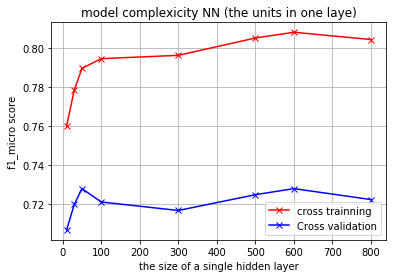

In [12]:
rt2 = pd.DataFrame(clf_MLP.cv_results_)             
x=[10,30,50,100,300,500,600,800]
plt.grid()
plt.plot(x,rt2['mean_train_score'],'x-',color="r")
plt.plot(x,rt2['mean_test_score'],'x-',color="b")
plt.legend([ 'cross trainning ','Cross validation',])
plt.xlabel('the size of a single hidden layer')
plt.ylabel('f1_micro score')
plt.title('model complexicity NN (the units in one laye)')
plt.show()



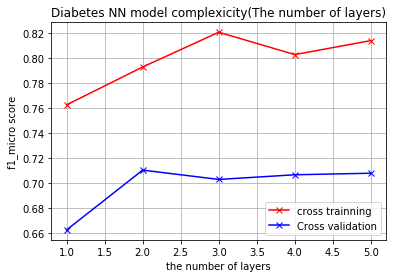

In [26]:
rt2 = pd.DataFrame(clf_MLP2.cv_results_)             
x=[1,2,3,4,5]
plt.grid()
plt.plot(x,rt2['mean_train_score'],'x-',color="r")
plt.plot(x,rt2['mean_test_score'],'x-',color="b")
plt.legend([ 'cross trainning ','Cross validation',])
plt.xlabel('the number of layers')
plt.ylabel('f1_micro score')
plt.title('Diabetes NN model complexicity(The number of layers)')
plt.show()



In [19]:
tuned_parameters4 = [{ 'max_iter':[2000],'hidden_layer_sizes':[[50,2]],'learning_rate_init':  [0.0005,0.001,0.005,0.01],'random_state': [0] }]
clf_MLP4=GridSearchCV(MLPClassifier(), tuned_parameters4, cv=shuffle_split,scoring='f1_micro',return_train_score=True)
clf_MLP4.fit(X_train_scaledStandard, Y_train)                     
print("Best parameters set found on development set:")
print()
print(clf_MLP4.best_params_)
print()
print("mean training:")
print()
print(clf_MLP4.cv_results_['mean_train_score'])
print("mean test:")
print()
print(clf_MLP4.cv_results_['mean_test_score'])
print("mean time:")
print()
print(clf_MLP4.cv_results_['mean_fit_time'])
print("Final real Test set score: {:.2f}".format(clf_MLP4.score(X_test_scaledStandard, Y_test)))

/Users/xiaodong2/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/xiaodong2/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/xiaodong2/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/xiaodong2/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization h

Best parameters set found on development set:

{'hidden_layer_sizes': [50, 2], 'learning_rate_init': 0.001, 'random_state': 0}

mean training:

[ 0.76055901  0.78680124  0.79611801  0.78338509]
mean test:

[ 0.70434783  0.71801242  0.71490683  0.70621118]
mean time:

[ 0.93282857  0.7601573   0.30287926  0.15065925]
Final real Test set score: 0.70


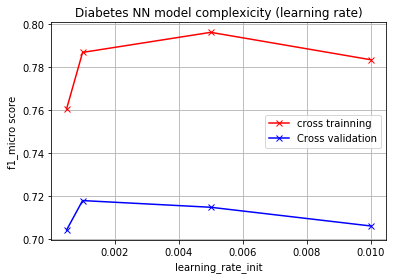

In [21]:
rt2 = pd.DataFrame(clf_MLP4.cv_results_)             
x=[0.0005,0.001,0.005,0.01]
plt.grid()
plt.plot(x,rt2['mean_train_score'],'x-',color="r")
plt.plot(x,rt2['mean_test_score'],'x-',color="b")
plt.legend([ 'cross trainning ','Cross validation',])
plt.xlabel('learning_rate_init')
plt.ylabel('f1_micro score')
plt.title('Diabetes NN model complexicity (learning rate)')
plt.show()



In [32]:
tuned_parameters3 = [{ 'max_iter':[50,100,200, 500, 1000, 2000,3000], 'learning_rate_init':[0.001], 'hidden_layer_sizes':[ [50,2]],'random_state': [0] }]
clf_MLP3=GridSearchCV(MLPClassifier(), tuned_parameters3, cv=shuffle_split,scoring='f1_micro',return_train_score=True)
clf_MLP3.fit(X_train_scaledStandard, Y_train)                     
print("Best parameters set found on development set:")
print()
print(clf_MLP3.best_params_)
print()
print("mean training:")
print()
print(clf_MLP3.cv_results_['mean_train_score'])
print("mean test:")
print()
print(clf_MLP3.cv_results_['mean_test_score'])
print("mean time:")
print()
print(clf_MLP3.cv_results_['mean_fit_time'])
print("Final real Test set score: {:.2f}".format(clf_MLP3.score(X_test_scaledStandard, Y_test)))

/Users/xiaodong2/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/xiaodong2/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/xiaodong2/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/xiaodong2/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn'

Best parameters set found on development set:

{'hidden_layer_sizes': [50, 2], 'learning_rate_init': 0.001, 'max_iter': 500, 'random_state': 0}

mean training:

[ 0.69208075  0.75822981  0.7863354   0.78819876  0.78819876  0.78819876
  0.78819876]
mean test:

[ 0.67329193  0.70621118  0.71118012  0.71614907  0.71614907  0.71614907
  0.71614907]
mean time:

[ 0.14037142  0.29009368  0.51339262  0.48392296  0.44616828  0.4654355
  0.4437886 ]
Final real Test set score: 0.70


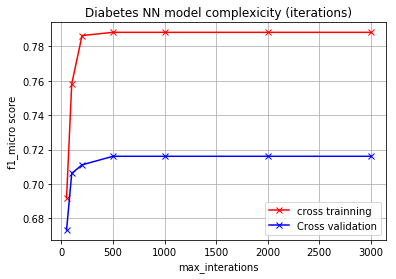

In [33]:
rt2 = pd.DataFrame(clf_MLP3.cv_results_)             
x=[50,100,200, 500, 1000, 2000,3000]
plt.grid()
plt.plot(x,rt2['mean_train_score'],'x-',color="r")
plt.plot(x,rt2['mean_test_score'],'x-',color="b")
plt.legend([ 'cross trainning ','Cross validation',])
plt.xlabel('max_interations')
plt.ylabel('f1_micro score')
plt.title('Diabetes NN model complexicity (iterations)')
plt.show()



In [34]:
display(pd.DataFrame(clf_MLP3.cv_results_) )

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_hidden_layer_sizes,param_learning_rate_init,param_max_iter,param_random_state,params,rank_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.140371,0.001069,0.673292,0.692081,"[50, 2]",0.001,50,0,"{'hidden_layer_sizes': [50, 2], 'learning_rate...",7,...,0.714286,0.709627,0.683230,0.709627,0.701863,0.709627,0.018664,0.000096,0.042509,0.062073
1,0.290094,0.001138,0.706211,0.758230,"[50, 2]",0.001,100,0,"{'hidden_layer_sizes': [50, 2], 'learning_rate...",6,...,0.726708,0.756211,0.714286,0.762422,0.720497,0.756211,0.023822,0.000217,0.037169,0.007185
2,0.513393,0.000817,0.711180,0.786335,"[50, 2]",0.001,200,0,"{'hidden_layer_sizes': [50, 2], 'learning_rate...",5,...,0.714286,0.760870,0.757764,0.774845,0.714286,0.779503,0.127464,0.000181,0.035491,0.012790
3,0.483923,0.000719,0.716149,0.788199,"[50, 2]",0.001,500,0,"{'hidden_layer_sizes': [50, 2], 'learning_rate...",1,...,0.714286,0.760870,0.757764,0.774845,0.714286,0.779503,0.156353,0.000096,0.040066,0.014252
4,0.446168,0.000717,0.716149,0.788199,"[50, 2]",0.001,1000,0,"{'hidden_layer_sizes': [50, 2], 'learning_rate...",1,...,0.714286,0.760870,0.757764,0.774845,0.714286,0.779503,0.115161,0.000112,0.040066,0.014252
5,0.465436,0.000805,0.716149,0.788199,"[50, 2]",0.001,2000,0,"{'hidden_layer_sizes': [50, 2], 'learning_rate...",1,...,0.714286,0.760870,0.757764,0.774845,0.714286,0.779503,0.124289,0.000216,0.040066,0.014252
6,0.443789,0.000943,0.716149,0.788199,"[50, 2]",0.001,3000,0,"{'hidden_layer_sizes': [50, 2], 'learning_rate...",1,...,0.714286,0.760870,0.757764,0.774845,0.714286,0.779503,0.123669,0.000576,0.040066,0.014252


In [42]:
sample_size=np.arange(50,560,20)
shuffle_split2 = ShuffleSplit(test_size=.1, train_size=.9, n_splits=10)
from sklearn.model_selection import learning_curve
samples, sample_train, sample_valid=learning_curve(MLPClassifier(hidden_layer_sizes=[50,2], max_iter=3000, learning_rate_init=0.001,random_state=0),X_train_scaledStandard, Y_train,  train_sizes=sample_size, cv=shuffle_split2)

Text(0.5,1,'learning curve for Diabetes NN Model')

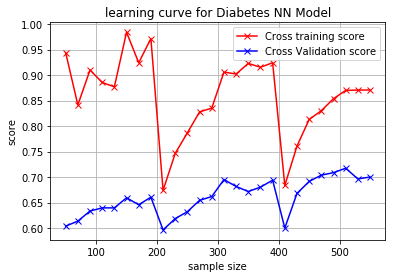

In [43]:
plt.plot(samples, np.mean(sample_train,axis=1),'x-', color="r",label="Cross training score")
plt.plot(samples, np.mean(sample_valid,axis=1), 'x-', color="b",label="Cross Validation score")
plt.legend(loc="best")
plt.grid()
plt.xlabel('sample size')
plt.ylabel('score')
plt.title('learning curve for Diabetes NN Model' )